# Import các thư viện


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


# Đọc dữ liệu


In [ ]:
df = pd.read_csv("../Data/hotel_bookings_resort.csv")
df


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent
0,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,0,3,0,0.00,0,0,Europe
1,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0,0,0,4,0,0.00,0,0,Europe
2,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,...,0,0,0,0,0,0,75.00,0,0,Europe
3,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,0,0,0,0,0,0,75.00,0,0,Europe
4,2015-07-01,2015-07-03,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,0,0,0,0,0,98.00,0,1,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33950,2017-08-31,2017-09-10,Resort Hotel,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,...,1,0,0,0,1,0,89.75,0,0,Europe
33951,2017-08-30,2017-09-10,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,0,0,0,0,0,202.27,0,1,Europe
33952,2017-08-29,2017-09-12,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,0,0,0,0,0,153.57,0,3,Europe
33953,2017-08-31,2017-09-14,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,D,D,No Deposit,...,0,0,0,0,0,0,112.80,0,1,Europe


# chuyển 2 cột date thành kiểu datetime trước rồi tiếp tục làm việc


In [ ]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


Nhóm khách hàng nào đặt đơn nhiều nhất ?


Các giá trị trong cột customer_type


In [ ]:
df["customer_type"].unique()


array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

Tỉ lệ số đơn đặt qua các tháng ứng với từng loại khách hàng


In [ ]:
df["month_year"] = df["arrival_date"].dt.to_period("M")


In [ ]:
num_order_by_customer_type = (
    df.groupby(["customer_type", "month_year"]).size().unstack()
)

num_order_by_customer_type = num_order_by_customer_type.fillna(0)

num_order_by_customer_type


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
customer_type,,,,,,,,,,,,,,,,,,,,,
Contract,139,77,196,101,16,7,3,10,11,25,...,3,1,3,16,8,101,134,142,81,108
Group,5,4,17,12,5,7,9,13,5,6,...,7,18,17,18,18,10,13,16,6,30
Transient,1070,1185,793,824,645,826,767,1019,1232,1058,...,1074,933,923,1085,837,1025,1151,1270,1471,1456
Transient-Party,65,78,161,204,199,121,39,103,215,268,...,101,202,200,227,330,335,207,100,112,119


In [ ]:
percent_num_order_by_customer_type = (
    num_order_by_customer_type / num_order_by_customer_type.sum() * 100
)
percent_num_order_by_customer_type = percent_num_order_by_customer_type.round(2)

percent_num_order_by_customer_type


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
customer_type,,,,,,,,,,,,,,,,,,,,,
Contract,10.87,5.73,16.80,8.85,1.85,0.73,0.37,0.87,0.75,1.84,...,0.25,0.09,0.26,1.19,0.67,6.87,8.90,9.29,4.85,6.30
Group,0.39,0.30,1.46,1.05,0.58,0.73,1.10,1.14,0.34,0.44,...,0.59,1.56,1.49,1.34,1.51,0.68,0.86,1.05,0.36,1.75
Transient,83.66,88.17,67.95,72.22,74.57,85.95,93.77,89.00,84.21,77.97,...,90.63,80.85,80.75,80.61,70.16,69.68,76.48,83.12,88.08,85.00
Transient-Party,5.08,5.80,13.80,17.88,23.01,12.59,4.77,9.00,14.70,19.75,...,8.52,17.50,17.50,16.86,27.66,22.77,13.75,6.54,6.71,6.95


Vẽ biểu đồ


In [ ]:
percent_num_order_by_customer_type = percent_num_order_by_customer_type.T.reset_index(
    names="month"
)

percent_num_order_by_customer_type["month_tst"] = percent_num_order_by_customer_type[
    "month"
].dt.to_timestamp()


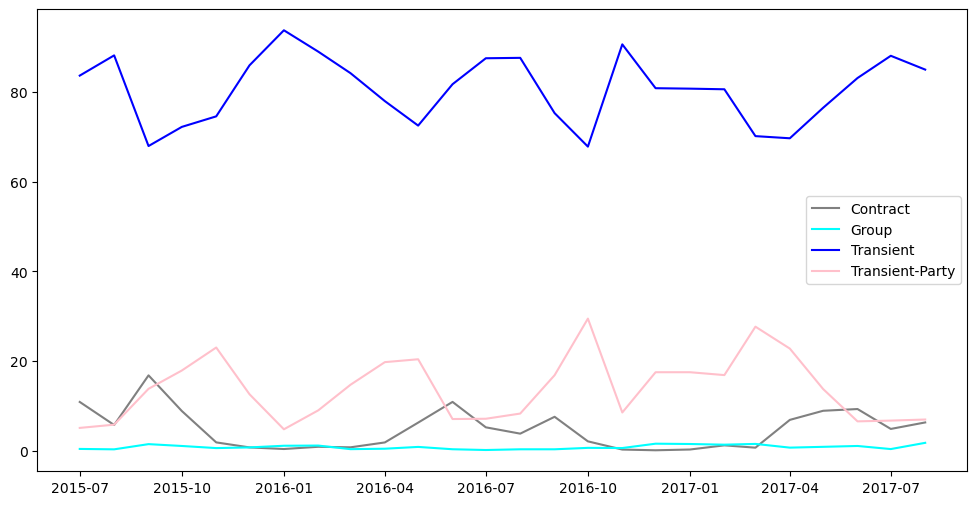

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(
    percent_num_order_by_customer_type["month_tst"],
    percent_num_order_by_customer_type["Contract"],
    label="Contract",
    color="gray",
)
plt.plot(
    percent_num_order_by_customer_type["month_tst"],
    percent_num_order_by_customer_type["Group"],
    label="Group",
    color="cyan",
)
plt.plot(
    percent_num_order_by_customer_type["month_tst"],
    percent_num_order_by_customer_type["Transient"],
    label="Transient",
    color="blue",
)
plt.plot(
    percent_num_order_by_customer_type["month_tst"],
    percent_num_order_by_customer_type["Transient-Party"],
    label="Transient-Party",
    color="pink",
)

plt.legend()

plt.show()


Biểu đồ cho thấy nhóm khách hàng Transient (khách hàng đơn lẻ) chiếm số lượng đông nhất qua các tháng, điều này là hợp lí

Xem xét các nhóm khách hàng còn lại, là các nhóm khách hàng đặt đơn theo nhóm (Contract, Group, Transient-Party), thực hiện kiểm định sau:

- H0: Trung bình 3 nhóm không có khác biệt gì
- H1: Trung bình 3 nhóm có sự khác biệt đáng kể


In [ ]:
def get_statistic(*groups):
    means = [np.mean(group) for group in groups]
    return np.var(means)


p_value = stats.permutation_test(
    (
        percent_num_order_by_customer_type["Contract"],
        percent_num_order_by_customer_type["Group"],
        percent_num_order_by_customer_type["Transient-Party"],
    ),
    statistic=get_statistic,
    n_resamples=1000000,
    alternative="greater",
).pvalue

p_value


9.99999000001e-07

nhận xét p_value < alpha nên có cơ sở khẳng định trung bình 3 nhóm có sự khác biệt đáng kể

Ước lượng khoảng tin cậy trung bình cho cả 3 nhóm


In [ ]:
mean_confident_interval_Contract = stats.bootstrap(
    (percent_num_order_by_customer_type["Contract"],),
    np.mean,
    confidence_level=0.95,
    method="percentile",
    n_resamples=1000000,
).confidence_interval

mean_confident_interval_Contract = [
    round(item, 2) for item in mean_confident_interval_Contract
]

mean_confident_interval_Group = stats.bootstrap(
    (percent_num_order_by_customer_type["Group"],),
    np.mean,
    confidence_level=0.95,
    method="percentile",
    n_resamples=1000000,
).confidence_interval

mean_confident_interval_Group = [
    round(item, 2) for item in mean_confident_interval_Group
]

mean_confident_interval_Transient_Party = stats.bootstrap(
    (percent_num_order_by_customer_type["Transient-Party"],),
    np.mean,
    confidence_level=0.95,
    method="percentile",
    n_resamples=1000000,
).confidence_interval

mean_confident_interval_Transient_Party = [
    round(item, 2) for item in mean_confident_interval_Transient_Party
]

mean_confident_interval = pd.Series(
    [
        mean_confident_interval_Contract,
        mean_confident_interval_Group,
        mean_confident_interval_Transient_Party,
    ],
    index=["Contract", "Group", "Transient-Party"],
)

mean_confident_interval


Contract             [3.16, 6.45]
Group                 [0.64, 1.0]
Transient-Party    [11.22, 16.62]
dtype: object

Trong 3 nhóm này thì nhóm khách hàng Transient-Party (không đặt chung nhưng có mối quan hệ với nhau) chiếm tỉ lệ lớn nhất và nhóm khách hàng Group (đặt theo nhóm) chiếm tỉ lệ nhỏ nhất

Ý nghĩa: Cần cải thiện dịch vụ để thu hút nhiều khách hàng đến từ các nhóm Group và Contract, từ đó góp phần tăng doanh thu của khách sạn


Xem xét các đơn phải chờ xác nhận


In [ ]:
df_days_in_waiting_list_g0 = df[df["days_in_waiting_list"] > 0]


Vẽ histogram của các giá trị days_in_waiting_list


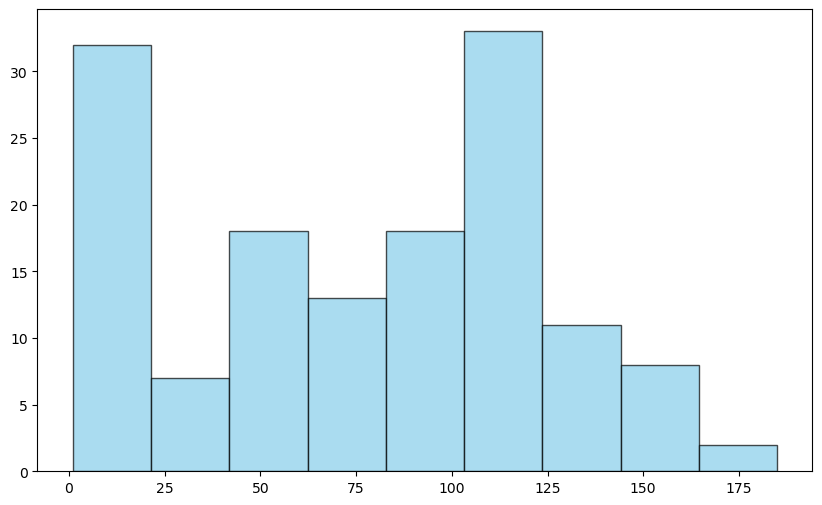

In [ ]:
plt.figure(figsize=(10, 3))
plt.hist(
    df_days_in_waiting_list_g0["days_in_waiting_list"],
    bins="auto",
    color="skyblue",
    edgecolor="black",
    alpha=0.7,
)
plt.show()


Chia days_in_waiting_list được chia thành 5 nhóm sau:
1 tháng

2 tháng

3 tháng

4 tháng

5 tháng trở lên


In [ ]:
df_days_in_waiting_list_g0["days_in_waiting_list_group"] = pd.cut(
    df_days_in_waiting_list_g0["days_in_waiting_list"],
    bins=[0, 30, 60, 90, 120, df_days_in_waiting_list_g0["days_in_waiting_list"].max()],
    labels=["1_month", "2_month", "3_month", "4_month", "5_month_more"],
)

df_days_in_waiting_list_g0["days_in_waiting_list_group"]


C:\Users\AdminPc\AppData\Local\Temp\ipykernel_20892\2248469837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_days_in_waiting_list_g0["days_in_waiting_list_group"] = pd.cut(


2131     2_month
2297     2_month
2301     2_month
2773     3_month
2777     3_month
          ...   
30160    3_month
30333    3_month
30764    1_month
30785    4_month
30862    4_month
Name: days_in_waiting_list_group, Length: 142, dtype: category
Categories (5, object): ['1_month' < '2_month' < '3_month' < '4_month' < '5_month_more']

Phân bố các giá trị trong days_in_waiting_list_group


In [ ]:
df_days_in_waiting_list_g0["days_in_waiting_list_group"].value_counts().sort_index()


1_month         34
2_month         20
3_month         17
4_month         27
5_month_more    44
Name: days_in_waiting_list_group, dtype: int64

vẽ group bar chart cho tỉ lệ số đơn hủy và không hủy qua từng nhóm trên


In [ ]:
num_order_by_days_in_waiting_list_group = (
    df_days_in_waiting_list_g0.groupby(["days_in_waiting_list_group", "is_canceled"])
    .size()
    .unstack()
)

num_order_by_days_in_waiting_list_group = (
    num_order_by_days_in_waiting_list_group.fillna(0)
)

num_order_by_days_in_waiting_list_group


is_canceled,0,1
days_in_waiting_list_group,,
1_month,29,5
2_month,15,5
3_month,16,1
4_month,25,2
5_month_more,41,3


In [ ]:
num_order_by_days_in_waiting_list_group = num_order_by_days_in_waiting_list_group.T
percent_num_order_by_days_in_waiting_list_group = (
    num_order_by_days_in_waiting_list_group
    / num_order_by_days_in_waiting_list_group.sum()
    * 100
)

percent_num_order_by_days_in_waiting_list_group = (
    percent_num_order_by_days_in_waiting_list_group.round(2)
)

percent_num_order_by_days_in_waiting_list_group


days_in_waiting_list_group,1_month,2_month,3_month,4_month,5_month_more
is_canceled,,,,,
0,85.29,75.0,94.12,92.59,93.18
1,14.71,25.0,5.88,7.41,6.82


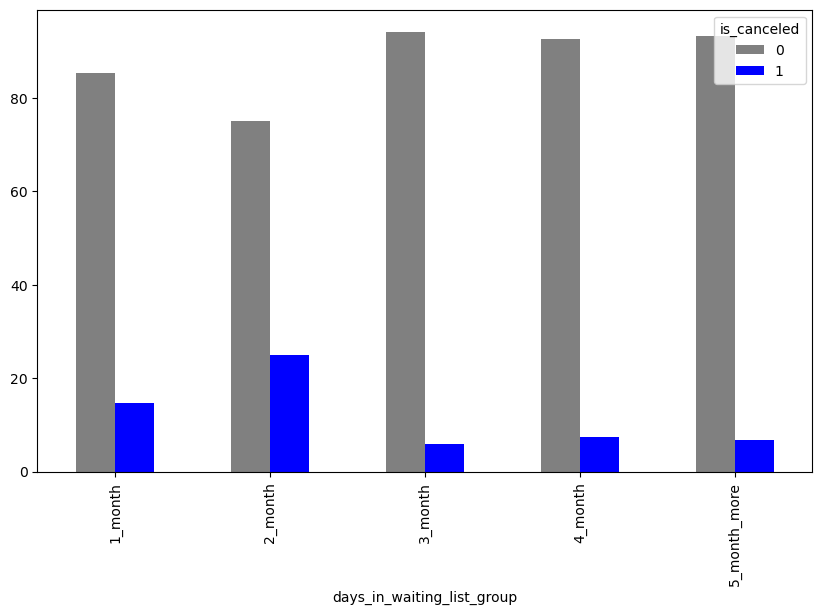

In [ ]:
percent_num_order_by_days_in_waiting_list_group = (
    percent_num_order_by_days_in_waiting_list_group.T
)

percent_num_order_by_days_in_waiting_list_group.plot(
    kind="bar", figsize=(10, 6), color=["gray", "blue"]
)


plt.show()


Thực hiện kiểm định chi-squared

- H0: days_in_waiting_list và is_canceled hoàn toàn độc lập
- H1: days_in_waiting_list và is_canceled hoàn toàn có mối liên hệ với nhau


In [ ]:
num_order_by_days_in_waiting_list_group


days_in_waiting_list_group,1_month,2_month,3_month,4_month,5_month_more
is_canceled,,,,,
0,29,15,16,25,41
1,5,5,1,2,3


In [ ]:
p_value = stats.chi2_contingency(num_order_by_days_in_waiting_list_group.to_numpy())[1]
p_value


0.2035886745590987

p_value > alpha nên có cơ sở khẳng định số ngày chờ xác nhận và việc hủy đơn hoàn toàn độc lập với nhau

Ý nghĩa: Như vậy yếu tố để cho khách hàng chờ xác nhận không ảnh hưởng đến việc khách hàng hủy đơn hay không, nên có thể bỏ qua yếu tố này


Trung bình số ngày ở theo từng số lượng khách hàng


Tạo cột mới num_guest


In [ ]:
df["num_guest"] = df["adults"] + df["children"] + df["babies"]

df["num_guest"]


0        2
1        2
2        1
3        1
4        2
        ..
33950    3
33951    2
33952    2
33953    2
33954    2
Name: num_guest, Length: 33955, dtype: int64

Phân bố giá trị của số người ở


In [ ]:
df["num_guest"].value_counts().sort_index()


0        12
1      5888
2     23243
3      2713
4      2039
5        45
6         1
10        1
12        1
20        2
26        5
27        2
40        1
50        1
55        1
Name: num_guest, dtype: int64

Chia thành các nhóm 0, 1, 2, 3, 4_more


In [ ]:
df["num_guest_group"] = pd.cut(
    df["num_guest"],
    bins=[-1, 0, 1, 2, 3, df["num_guest"].max()],
    labels=["0", "1", "2", "3", "4_more"],
)

df["num_guest_group"]


0        2
1        2
2        1
3        1
4        2
        ..
33950    3
33951    2
33952    2
33953    2
33954    2
Name: num_guest_group, Length: 33955, dtype: category
Categories (5, object): ['0' < '1' < '2' < '3' < '4_more']

Tạo cột mới num_staying_day


In [ ]:
df["num_staying_day"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]

df["num_staying_day"]


0         0
1         0
2         1
3         1
4         2
         ..
33950    10
33951    11
33952    14
33953    14
33954    14
Name: num_staying_day, Length: 33955, dtype: int64

Phân bố các giá trị của số ngày ở


In [ ]:
df["num_staying_day"].value_counts().sort_index()


0      363
1     6891
2     4920
3     4287
4     3954
5     2562
6     1626
7     5675
8      701
9      581
10     884
11     291
12     139
13      93
14     771
15      32
16      18
17      12
18      18
19      10
20       1
21      45
22       6
23       3
25      12
26       3
27       1
28      31
29       3
30       5
33       1
35       5
38       1
42       4
45       1
46       1
56       2
60       1
69       1
Name: num_staying_day, dtype: int64

Ứng với từng số người ở lấy ra tập giá trị số ngày ở tương ứng


In [ ]:
num_staying_days = df.groupby(["num_guest_group"])["num_staying_day"].apply(list)
num_staying_days


num_guest_group
0                    [3, 0, 3, 5, 6, 0, 0, 10, 1, 12, 8, 7]
1         [1, 1, 5, 14, 4, 1, 1, 1, 1, 1, 14, 0, 7, 11, ...
2         [0, 0, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 1, 1, ...
3         [4, 4, 4, 4, 4, 2, 2, 8, 21, 7, 7, 6, 7, 7, 7,...
4_more    [7, 1, 2, 7, 1, 1, 6, 7, 9, 5, 4, 7, 4, 1, 2, ...
Name: num_staying_day, dtype: object

Bỏ giá trị 0 đi


In [ ]:
num_staying_days = num_staying_days.drop("0")
num_staying_days


num_guest_group
1         [1, 1, 5, 14, 4, 1, 1, 1, 1, 1, 14, 0, 7, 11, ...
2         [0, 0, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 1, 1, ...
3         [4, 4, 4, 4, 4, 2, 2, 8, 21, 7, 7, 6, 7, 7, 7,...
4_more    [7, 1, 2, 7, 1, 1, 6, 7, 9, 5, 4, 7, 4, 1, 2, ...
Name: num_staying_day, dtype: object

Ước lượng khoảng trung bình cho các nhóm


In [ ]:
def get_confident_interval(sample):
    result = stats.bootstrap(
        (sample,),
        np.mean,
        confidence_level=0.95,
        n_resamples=10000,
        method="percentile",
    ).confidence_interval

    result = [round(item, 2) for item in result]

    return result


mean_confident_interval = num_staying_days.apply(lambda x: get_confident_interval(x))
mean_confident_interval


num_guest_group
1         [2.85, 3.02]
2         [4.63, 4.72]
3         [4.82, 5.04]
4_more    [4.51, 4.76]
Name: num_staying_day, dtype: object

Như vậy khi có nhiều người ở khách sạn thì số ngày ở cũng tăng

Ý nghĩa: Giúp khách sạn có chiến lược phân bổ phòng hợp lí hơn nhằm phục vụ tốt hơn cho những người ở nhiều ngày


Khách hàng đặt đơn qua kênh nào nhiều nhất ?


Xem các giá trị của cột distribution_channel


In [ ]:
df["distribution_channel"].unique()


array(['Direct', 'Corporate', 'TA/TO', 'Undefined'], dtype=object)

tỉ lệ số đơn đặt qua các tháng ứng với từng loại kênh


In [ ]:
num_order = df.groupby(["distribution_channel", "month_year"]).size().unstack()

num_order = num_order.fillna(0)

num_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
distribution_channel,,,,,,,,,,,,,,,,,,,,,
Corporate,21.0,22.0,38.0,176.0,229.0,65.0,87.0,106.0,101.0,127.0,...,95.0,72.0,115.0,148.0,197.0,101.0,61.0,61.0,46.0,15.0
Direct,255.0,312.0,189.0,286.0,141.0,231.0,232.0,288.0,357.0,311.0,...,203.0,283.0,325.0,320.0,235.0,224.0,218.0,253.0,338.0,301.0
TA/TO,1002.0,1010.0,940.0,679.0,495.0,665.0,499.0,751.0,1005.0,919.0,...,887.0,799.0,703.0,878.0,761.0,1146.0,1226.0,1214.0,1286.0,1397.0
Undefined,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
percent_num_order = num_order / num_order.sum() * 100
percent_num_order = percent_num_order.round(2)

percent_num_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
distribution_channel,,,,,,,,,,,,,,,,,,,,,
Corporate,1.64,1.64,3.26,15.43,26.47,6.76,10.64,9.26,6.90,9.36,...,8.02,6.24,10.06,11.00,16.51,6.87,4.05,3.99,2.75,0.88
Direct,19.94,23.21,16.20,25.07,16.30,24.04,28.36,25.15,24.40,22.92,...,17.13,24.52,28.43,23.77,19.70,15.23,14.49,16.56,20.24,17.57
TA/TO,78.34,75.15,80.55,59.51,57.23,69.20,61.00,65.59,68.69,67.72,...,74.85,69.24,61.50,65.23,63.79,77.91,81.46,79.45,77.01,81.55
Undefined,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Loại bỏ giá trị Undefined


In [ ]:
percent_num_order = percent_num_order.drop(index="Undefined")

percent_num_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
distribution_channel,,,,,,,,,,,,,,,,,,,,,
Corporate,1.64,1.64,3.26,15.43,26.47,6.76,10.64,9.26,6.90,9.36,...,8.02,6.24,10.06,11.00,16.51,6.87,4.05,3.99,2.75,0.88
Direct,19.94,23.21,16.20,25.07,16.30,24.04,28.36,25.15,24.40,22.92,...,17.13,24.52,28.43,23.77,19.70,15.23,14.49,16.56,20.24,17.57
TA/TO,78.34,75.15,80.55,59.51,57.23,69.20,61.00,65.59,68.69,67.72,...,74.85,69.24,61.50,65.23,63.79,77.91,81.46,79.45,77.01,81.55


Vẽ biểu đồ


In [ ]:
percent_num_order = percent_num_order.T
percent_num_order


In [ ]:
percent_num_order = percent_num_order.reset_index(names="month")

percent_num_order["month_tst"] = percent_num_order["month"].dt.to_timestamp()

percent_num_order


distribution_channel,month,Corporate,Direct,TA/TO,month_tst
0,2015-07,1.64,19.94,78.34,2015-07-01
1,2015-08,1.64,23.21,75.15,2015-08-01
2,2015-09,3.26,16.20,80.55,2015-09-01
3,2015-10,15.43,25.07,59.51,2015-10-01
4,2015-11,26.47,16.30,57.23,2015-11-01
5,2015-12,6.76,24.04,69.20,2015-12-01
6,2016-01,10.64,28.36,61.00,2016-01-01
7,2016-02,9.26,25.15,65.59,2016-02-01
8,2016-03,6.90,24.40,68.69,2016-03-01
9,2016-04,9.36,22.92,67.72,2016-04-01


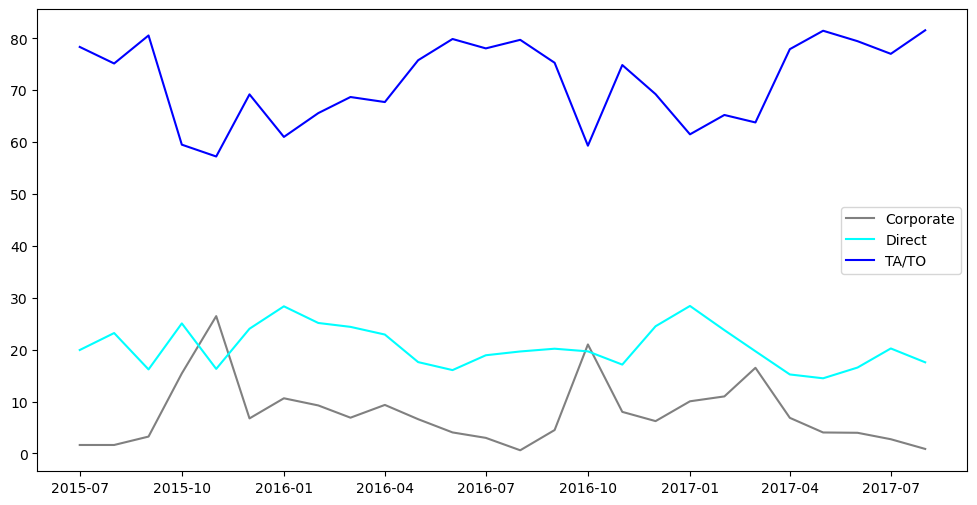

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(
    percent_num_order["month_tst"],
    percent_num_order["Corporate"],
    label="Corporate",
    color="gray",
)
plt.plot(
    percent_num_order["month_tst"],
    percent_num_order["Direct"],
    label="Direct",
    color="cyan",
)
plt.plot(
    percent_num_order["month_tst"],
    percent_num_order["TA/TO"],
    label="TA/TO",
    color="blue",
)
plt.legend()

plt.show()


Như vậy khách hàng đặt kênh chủ yếu qua TA/TO

Ý nghĩa: cần tập trung đầu tư cơ sở hạ tầng của kênh TA/TO (đại lí du lịch) nhằm đáp ứng nhu cầu đặt hàng của khách hàng tốt hơn


1. Khách hàng đến từ châu lục nào có tỉ lệ hủy đơn cao nhất ?


Các giá trị trong cột Continent


In [ ]:
df["continent"].unique()


array(['Europe', 'North_America', 'undefined', 'Asia', 'South_America',
       'Oceania', 'Africa'], dtype=object)

Không xét các giá trị undefined


In [ ]:
df_defined = df[df["continent"] != "undefined"]
df_defined


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,continent,month_year,order_like_desired,num_guest,num_staying_day,num_guest_group
0,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0.00,0,0,Europe,2015-07,1,2,0,2
1,2015-07-01,2015-07-01,Resort Hotel,BB,PRT,Direct,Direct,C,C,No Deposit,...,0,0.00,0,0,Europe,2015-07,1,2,0,2
2,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Direct,Direct,A,C,No Deposit,...,0,75.00,0,0,Europe,2015-07,0,1,1,1
3,2015-07-01,2015-07-02,Resort Hotel,BB,GBR,Corporate,Corporate,A,A,No Deposit,...,0,75.00,0,0,Europe,2015-07,1,1,1,1
4,2015-07-01,2015-07-03,Resort Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,0,98.00,0,1,Europe,2015-07,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33950,2017-08-31,2017-09-10,Resort Hotel,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,...,0,89.75,0,0,Europe,2017-08,1,3,10,3
33951,2017-08-30,2017-09-10,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,202.27,0,1,Europe,2017-08,1,2,11,2
33952,2017-08-29,2017-09-12,Resort Hotel,BB,IRL,Direct,Direct,E,E,No Deposit,...,0,153.57,0,3,Europe,2017-08,1,2,14,2
33953,2017-08-31,2017-09-14,Resort Hotel,HB,GBR,Offline TA/TO,TA/TO,D,D,No Deposit,...,0,112.80,0,1,Europe,2017-08,1,2,14,2


Tính số đơn hủy trong 1 tháng của các châu luc


In [ ]:
df_defined_canceled = df_defined[df_defined["is_canceled"] == 1]

num_canceled_order = (
    df_defined_canceled.groupby(["continent", "month_year"]).size().unstack()
)

num_canceled_order = num_canceled_order.fillna(0)


In [ ]:
num_canceled_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
continent,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,2.0,1.0,1.0,0.0,4.0,1.0,10.0,16.0
Asia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3.0,3.0,7.0,7.0,7.0,3.0,13.0,14.0,26.0,19.0
Europe,280.0,341.0,246.0,148.0,105.0,152.0,87.0,151.0,237.0,258.0,...,192.0,229.0,162.0,270.0,212.0,380.0,363.0,502.0,551.0,588.0
North_America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,2.0,2.0,5.0,6.0,8.0,5.0,10.0
Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,1.0,0.0,2.0,2.0,6.0,1.0
South_America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,6.0,5.0,12.0,8.0,3.0,4.0,10.0,7.0,10.0,5.0


Tính số đơn trong 1 tháng của các châu luc


In [ ]:
num_order = df_defined.groupby(["continent", "month_year"]).size().unstack()

num_order = num_order.fillna(0)

num_order


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
continent,,,,,,,,,,,,,,,,,,,,,
Africa,4.0,3.0,0.0,5.0,4.0,5.0,6.0,3.0,3.0,2.0,...,6.0,4.0,6.0,7.0,2.0,8.0,8.0,4.0,21.0,22.0
Asia,27.0,12.0,27.0,10.0,3.0,11.0,17.0,11.0,26.0,16.0,...,11.0,20.0,22.0,30.0,36.0,25.0,75.0,83.0,108.0,77.0
Europe,1199.0,1285.0,1096.0,1080.0,821.0,909.0,738.0,1081.0,1384.0,1283.0,...,1120.0,1067.0,1047.0,1250.0,1114.0,1372.0,1345.0,1380.0,1453.0,1532.0
North_America,17.0,19.0,11.0,13.0,6.0,7.0,9.0,6.0,4.0,17.0,...,6.0,16.0,9.0,18.0,8.0,20.0,28.0,31.0,40.0,44.0
Oceania,3.0,2.0,3.0,3.0,2.0,2.0,1.0,3.0,2.0,4.0,...,5.0,0.0,5.0,0.0,2.0,8.0,8.0,7.0,10.0,8.0
South_America,16.0,11.0,10.0,7.0,10.0,7.0,14.0,8.0,9.0,11.0,...,17.0,19.0,32.0,19.0,12.0,26.0,41.0,23.0,38.0,30.0


Tính tỉ lệ hủy đơn trong 1 tháng của các châu lục


In [ ]:
percent_canceled = num_canceled_order / num_order * 100
percent_canceled = percent_canceled.round(2)
percent_canceled


month_year,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,...,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08
continent,,,,,,,,,,,,,,,,,,,,,
Africa,0.00,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,50.00,...,0.00,25.00,33.33,14.29,50.00,0.00,50.00,25.00,47.62,72.73
Asia,0.00,0.00,0.00,10.0,0.00,0.00,0.00,0.00,3.85,6.25,...,27.27,15.00,31.82,23.33,19.44,12.00,17.33,16.87,24.07,24.68
Europe,23.35,26.54,22.45,13.7,12.79,16.72,11.79,13.97,17.12,20.11,...,17.14,21.46,15.47,21.60,19.03,27.70,26.99,36.38,37.92,38.38
North_America,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,25.00,0.00,11.11,25.00,25.00,21.43,25.81,12.50,22.73
Oceania,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,60.00,NaN,50.00,0.00,25.00,28.57,60.00,12.50
South_America,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,27.27,...,35.29,26.32,37.50,42.11,25.00,15.38,24.39,30.43,26.32,16.67


Kiểm tra các giá trị nan


In [ ]:
null_values_index = percent_canceled.applymap(lambda x: pd.isnull(x)).stack().index

null_values_index


MultiIndex([(       'Africa', '2015-07'),
            (       'Africa', '2015-08'),
            (       'Africa', '2015-09'),
            (       'Africa', '2015-10'),
            (       'Africa', '2015-11'),
            (       'Africa', '2015-12'),
            (       'Africa', '2016-01'),
            (       'Africa', '2016-02'),
            (       'Africa', '2016-03'),
            (       'Africa', '2016-04'),
            ...
            ('South_America', '2016-11'),
            ('South_America', '2016-12'),
            ('South_America', '2017-01'),
            ('South_America', '2017-02'),
            ('South_America', '2017-03'),
            ('South_America', '2017-04'),
            ('South_America', '2017-05'),
            ('South_America', '2017-06'),
            ('South_America', '2017-07'),
            ('South_America', '2017-08')],
           names=['continent', 'month_year'], length=156)

Ở đây các giá trị nan tương ứng với việc là không có khách hàng nào từ châu lục đó đặt trong tháng đó

chuyển percent_canceled thành 1 Series và loại bỏ giá trị nan


In [ ]:
def drop_na_in_list(lst):
    lst = pd.Series(lst)
    lst = lst.dropna()
    return list(lst)


percent_canceled = percent_canceled.apply(lambda x: x.tolist(), axis=1)

percent_canceled = percent_canceled.apply(lambda x: drop_na_in_list(x))

percent_canceled


continent
Africa           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 50.0,...
Asia             [0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 3.85...
Europe           [23.35, 26.54, 22.45, 13.7, 12.79, 16.72, 11.7...
North_America    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Oceania          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
South_America    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
dtype: object

Ước lượng khoảng tin cậy cho các châu lục


In [ ]:
def get_confident_interval(sample):
    return stats.bootstrap(
        (sample,),
        np.mean,
        confidence_level=0.95,
        n_resamples=1000000,
        method="percentile",
    ).confidence_interval


def round_confident_interval(ci):
    return [round(item, 2) for item in ci]


ci_percent_canceled = percent_canceled.apply(lambda x: get_confident_interval(x))

ci_percent_canceled = ci_percent_canceled.apply(lambda x: round_confident_interval(x))

ci_percent_canceled


continent
Africa            [13.1, 31.84]
Asia               [8.15, 15.6]
Europe           [20.33, 26.15]
North_America     [5.57, 13.74]
Oceania           [3.42, 18.65]
South_America    [11.99, 23.01]
dtype: object

Các khoảng tin cậy hơi sai lệch, giảm các tháng xuống thành các tuần


Tính số đơn hủy trong 1 tuần của các châu luc


In [ ]:
df_defined["week_year"] = df_defined["arrival_date"].dt.to_period("W")

df_defined_canceled = df_defined[df_defined["is_canceled"] == 1]

num_canceled_order = (
    df_defined_canceled.groupby(["continent", "week_year"]).size().unstack()
)

num_canceled_order = num_canceled_order.fillna(0)

num_canceled_order


C:\Users\AdminPc\AppData\Local\Temp\ipykernel_20892\765420498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defined['week_year'] = df_defined['arrival_date'].dt.to_period('W')


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
continent,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,5.0,7.0,6.0,3.0,2.0,0.0
Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,7.0,3.0,10.0,10.0,1.0,4.0,1.0,3.0
Europe,48.0,47.0,65.0,67.0,88.0,70.0,93.0,60.0,76.0,76.0,...,124.0,106.0,122.0,127.0,121.0,154.0,115.0,158.0,123.0,65.0
North_America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,1.0,1.0,2.0,3.0,3.0,1.0
Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
South_America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,2.0,1.0,4.0,2.0,0.0,0.0,1.0,2.0


Tính số đơn trong 1 tuần của các châu luc


In [ ]:
num_order = df_defined.groupby(["continent", "week_year"]).size().unstack()

num_order = num_order.fillna(0)

num_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
continent,,,,,,,,,,,,,,,,,,,,,
Africa,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,...,2.0,3.0,3.0,5.0,6.0,9.0,7.0,6.0,3.0,0.0
Asia,2.0,7.0,2.0,8.0,8.0,3.0,4.0,3.0,2.0,3.0,...,30.0,34.0,18.0,19.0,31.0,30.0,15.0,11.0,8.0,13.0
Europe,204.0,245.0,278.0,273.0,311.0,277.0,315.0,261.0,287.0,294.0,...,316.0,286.0,362.0,308.0,317.0,364.0,322.0,383.0,347.0,175.0
North_America,5.0,5.0,3.0,1.0,3.0,5.0,3.0,7.0,4.0,3.0,...,8.0,9.0,13.0,5.0,7.0,6.0,11.0,14.0,7.0,6.0
Oceania,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,0.0,1.0,2.0,4.0,3.0,2.0,3.0,0.0,0.0
South_America,3.0,2.0,2.0,3.0,6.0,0.0,4.0,2.0,4.0,4.0,...,8.0,6.0,9.0,12.0,7.0,10.0,2.0,8.0,5.0,5.0


Tính tỉ lệ hủy đơn trong 1 tuần của các châu lục


In [ ]:
percent_canceled = num_canceled_order / num_order * 100
percent_canceled = percent_canceled.round(2)
percent_canceled


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
continent,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00,NaN,...,0.00,0.00,33.33,40.00,83.33,77.78,85.71,50.00,66.67,NaN
Asia,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,16.67,14.71,38.89,15.79,32.26,33.33,6.67,36.36,12.50,23.08
Europe,23.53,19.18,23.38,24.54,28.3,25.27,29.52,22.99,26.48,25.85,...,39.24,37.06,33.70,41.23,38.17,42.31,35.71,41.25,35.45,37.14
North_America,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,37.50,11.11,7.69,0.00,14.29,16.67,18.18,21.43,42.86,16.67
Oceania,NaN,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,100.00,NaN,100.00,0.00,50.00,0.00,0.00,33.33,NaN,NaN
South_America,0.00,0.00,0.00,0.00,0.0,NaN,0.00,0.00,0.00,0.00,...,62.50,0.00,22.22,8.33,57.14,20.00,0.00,0.00,20.00,40.00


Kiểm tra các giá trị nan


In [ ]:
null_values_index = percent_canceled.applymap(lambda x: pd.isnull(x)).stack().index

null_values_index


MultiIndex([(       'Africa', '2015-06-29/2015-07-05'),
            (       'Africa', '2015-07-06/2015-07-12'),
            (       'Africa', '2015-07-13/2015-07-19'),
            (       'Africa', '2015-07-20/2015-07-26'),
            (       'Africa', '2015-07-27/2015-08-02'),
            (       'Africa', '2015-08-03/2015-08-09'),
            (       'Africa', '2015-08-10/2015-08-16'),
            (       'Africa', '2015-08-17/2015-08-23'),
            (       'Africa', '2015-08-24/2015-08-30'),
            (       'Africa', '2015-08-31/2015-09-06'),
            ...
            ('South_America', '2017-06-26/2017-07-02'),
            ('South_America', '2017-07-03/2017-07-09'),
            ('South_America', '2017-07-10/2017-07-16'),
            ('South_America', '2017-07-17/2017-07-23'),
            ('South_America', '2017-07-24/2017-07-30'),
            ('South_America', '2017-07-31/2017-08-06'),
            ('South_America', '2017-08-07/2017-08-13'),
            ('South_America', '2

Ở đây các giá trị nan tương ứng với việc là không có khách hàng nào từ châu lục đó đặt trong tuần đó

chuyển percent_canceled thành 1 Series và loại bỏ giá trị nan


In [ ]:
def drop_na_in_list(lst):
    lst = pd.Series(lst)
    lst = lst.dropna()
    return list(lst)


percent_canceled = percent_canceled.apply(lambda x: x.tolist(), axis=1)

percent_canceled = percent_canceled.apply(lambda x: drop_na_in_list(x))

percent_canceled


continent
Africa           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Asia             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Europe           [23.53, 19.18, 23.38, 24.54, 28.3, 25.27, 29.5...
North_America    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Oceania          [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
South_America    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
dtype: object

Ước lượng khoảng tin cậy cho các châu lục


In [ ]:
def get_confident_interval(sample):
    return stats.bootstrap(
        (sample,),
        np.mean,
        confidence_level=0.95,
        n_resamples=1000000,
        method="percentile",
    ).confidence_interval


def round_confident_interval(ci):
    return [round(item, 2) for item in ci]


ci_percent_canceled = percent_canceled.apply(lambda x: get_confident_interval(x))

ci_percent_canceled = ci_percent_canceled.apply(lambda x: round_confident_interval(x))

ci_percent_canceled


continent
Africa            [15.6, 30.87]
Asia               [8.66, 14.6]
Europe           [21.49, 24.62]
North_America      [7.8, 13.94]
Oceania            [6.18, 20.7]
South_America    [13.47, 22.06]
dtype: object

Từ khoảng tin cậy, ta chọn ra Africa, Europe và South_America để tiếp tục xét


In [ ]:
percent_canceled_3_continents = percent_canceled[["Africa", "Europe", "South_America"]]

percent_canceled_3_continents


continent
Africa           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Europe           [23.53, 19.18, 23.38, 24.54, 28.3, 25.27, 29.5...
South_America    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
dtype: object

Trung bình mẫu của 3 châu lục này


In [ ]:
mean_percent_canceled_3_continents = percent_canceled_3_continents.apply(
    lambda x: np.mean(x)
)

mean_percent_canceled_3_continents


continent
Africa           23.015890
Europe           23.046930
South_America    17.635714
dtype: float64

Thực hiện kiểm định sau:

- H0: Trung bình 3 nhóm không có sự khác biệt
- H1: Trung bình 3 nhóm có sự khác biệt


In [ ]:
def get_statistic(*groups):
    means = [np.mean(group) for group in groups]
    return np.var(means)


result = stats.permutation_test(
    (
        mean_percent_canceled_3_continents["Africa"],
        mean_percent_canceled_3_continents["Europe"],
        mean_percent_canceled_3_continents["South_America"],
    ),
    statistic=get_statistic,
    n_resamples=1000000,
    alternative="greater",
)

p_value = result.pvalue


AxisError: `axis` is out of bounds for array of dimension 0